# **Data Visualisation - Brain Tumor Detection**

## Objectives



## Inputs



## Outputs




## Comments/Conclusions

---

## Set Data Directory

---

### Import Libraries

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
sns.set_style("white")
from matplotlib.image import imread

## Set Working Directory

In [2]:
cwd= os.getcwd()

In [3]:
os.chdir('/workspace/brain-tumor-detection')
print("You set a new current directory")

You set a new current directory


In [4]:
work_dir = os.getcwd()
work_dir

'/workspace/brain-tumor-detection'

## Set Input Directories

Set test, train and validation paths

In [5]:
my_data_dir = 'inputs/mriscans_dataset/mri-scans'
test_path = my_data_dir + '/test'
train_path = my_data_dir + '/train'
validation_path = my_data_dir + '/validation'

## Set Output Directory

In [6]:
version = 'v1'
file_path = f'outputs/{version}'

if 'outputs' in os.listdir(work_dir) and version in os.listdir(work_dir + '/outputs'):
    print('Old version is already available create a new version.')
    pass
else:
    os.makedirs(name=file_path)

## Set Label Names

In [7]:
labels = os.listdir(train_path)
print('Label for the images are', labels)

Label for the images are ['healthy', 'tumor']


---

# Data Visualisation of Image Data

---

## Image Shape

It is recommended to normalise image pixel values relative to tge dataset mean and standard deviation. This will help get constant results when applying a model to new images and it can also be useful for transfer learning. 

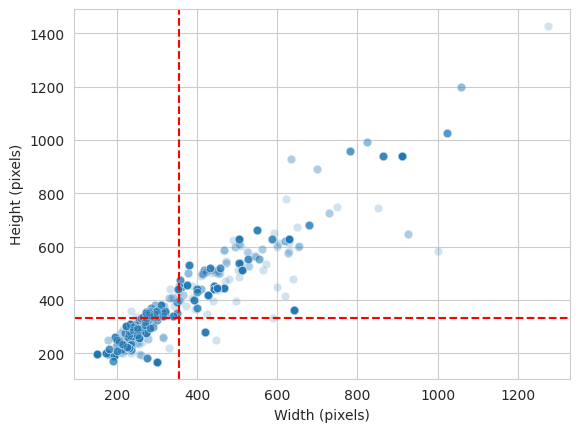

Width average: 334 
Height average: 355


In [8]:
# Analyse the dimensions of the images
image_height, image_width = [], []
for label in labels:
    for image_file in os.listdir(os.path.join(train_path, label)):
        image = imread(os.path.join(train_path, label, image_file))
        image_height.append(image.shape[0])
        image_width.append(image.shape[1])

# Plot image dimensions on a graph
sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=image_width, y=image_height, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
image_height_mean = int(np.array(image_height).mean())
image_width_mean = int(np.array(image_width).mean())
axes.axvline(x=image_height_mean, color='r', linestyle='--')
axes.axhline(y=image_width_mean, color='r', linestyle='--')
plt.show()
print(f"Width average: {image_width_mean} \nHeight average: {image_height_mean}")

The images used in this dataset vary in size, therefore, this is the information that the graph above has shown

### Images size for training the model is the average from all images in the train set

In [9]:
image_shape = (image_height_mean, image_width_mean, 3)
image_shape

(355, 334, 3)

### Save the image shape embeddings

In [10]:
joblib.dump(value=image_shape ,
            filename=f"{file_path}/image_shape.pkl")

['outputs/v1/image_shape.pkl']